In [2]:
import pandas as pd
import torch as t
import numpy as np
import os 
import matplotlib.pyplot as plt
from scipy import ndimage
import random
from tqdm import tqdm


# LM-37 bacteria

In [3]:
df_37 = pd.read_csv(
    "bacteria-37.csv",
    header=1,
    usecols= [
        "Position X",
        "Position Y",
        "Position Z",
        "Time",
        "TrackID",
        "ID"
    ]
)

In [4]:
deviations_37 = []
for trackID in pd.unique(df_37["TrackID"]):
    track_data = df_37[df_37["TrackID"] == trackID].sort_values(by="Time")
    deviations_track = []
    og_x = track_data["Position X"].iloc[0]
    og_y = track_data["Position Y"].iloc[0]
    for index, timepoint in track_data[1:].iterrows():
        deviation_x = np.abs(og_x - timepoint["Position X"])
        deviation_y = np.abs(og_y - timepoint["Position Y"])
        deviations_track.append({
            "trackID": trackID,
            "t": timepoint["Time"],
            "deviation_x": deviation_x,
            "deviation_y": deviation_y
        })
    deviations_37.append(pd.DataFrame(deviations_track))
df_deviations_37 =  pd.concat(deviations_37)
display(df_deviations_37.head())   

,trackID,t,deviation_x,deviation_y
0,1000000008,2.0,0.004,0.0
1,1000000008,3.0,0.014,0.0
2,1000000008,4.0,0.024,0.0
3,1000000008,5.0,0.001,0.0
4,1000000008,6.0,0.005,0.0


In [5]:
MSDs_37 = []
for timestamp in pd.unique(df_deviations_37["t"]):
    data_slice = df_deviations_37[df_deviations_37["t"] == timestamp]
    mean_sq_x_dev = np.mean(data_slice["deviation_x"].to_numpy()**2)
    mean_sq_y_dev = np.mean(data_slice["deviation_y"].to_numpy()**2)
    MSDs_37.append(mean_sq_x_dev + mean_sq_y_dev)

# LM-RT bacteria

In [6]:
df_rt = pd.read_csv(
    "bacteria-RT.csv",
    header=1,
    usecols= [
        "Position X",
        "Position Y",
        "Position Z",
        "Time",
        "TrackID",
        "ID"
    ]
)

In [7]:
deviations_rt = []
for trackID in pd.unique(df_rt["TrackID"]):
    track_data = df_rt[df_rt["TrackID"] == trackID].sort_values(by="Time")
    deviations_track = []
    og_x = track_data["Position X"].iloc[0]
    og_y = track_data["Position Y"].iloc[0]
    for index, timepoint in track_data[1:].iterrows():
        deviation_x = np.abs(og_x - timepoint["Position X"])
        deviation_y = np.abs(og_y - timepoint["Position Y"])
        deviations_track.append({
            "trackID": trackID,
            "t": timepoint["Time"],
            "deviation_x": deviation_x,
            "deviation_y": deviation_y
        })
    deviations_rt.append(pd.DataFrame(deviations_track))
df_deviations_rt =  pd.concat(deviations_rt)
display(df_deviations_rt.head())   

,trackID,t,deviation_x,deviation_y
0,1000000007,2.0,0.073,0.0
1,1000000007,3.0,0.470,0.0
2,1000000007,4.0,0.397,0.0
3,1000000007,5.0,0.384,0.0
4,1000000007,6.0,0.357,0.0


In [8]:
MSDs_rt = []
for timestamp in pd.unique(df_deviations_rt["t"]):
    data_slice = df_deviations_rt[df_deviations_rt["t"] == timestamp]
    mean_sq_x_dev = np.mean(data_slice["deviation_x"].to_numpy()**2)
    mean_sq_y_dev = np.mean(data_slice["deviation_y"].to_numpy()**2)
    MSDs_rt.append(mean_sq_x_dev + mean_sq_y_dev)

# Load in the filtered data

available at https://drive.google.com/drive/folders/1DPhudldr3XQQDubrWk9clN5dPTjCN3Bq?usp=sharing

In [9]:
data_folder = "./bacteria_filtered/csv"
track_paths = os.listdir(data_folder)

frames = []
for path in track_paths:
    df = pd.read_csv(f"{data_folder}/{path}", index_col=0)
    df["trackID"] = path.split(" ")[-2]
    #print(df.head())
    frames.append(df)

df_filtered = pd.concat(frames, ignore_index=True)
display(df_filtered.head())

,t,x,y,trackID
0,0.25,274.245,261.445,1000000032
1,0.50,274.232,261.450,1000000032
2,0.75,274.237,261.449,1000000032
3,1.00,274.224,261.416,1000000032
4,1.25,274.225,261.369,1000000032


In [10]:
deviations = []
for trackID in pd.unique(df_filtered["trackID"]):
    track_data = df_filtered[df_filtered["trackID"] == trackID].sort_values(by="t")
    deviations_track = []
    #print(track_data.head())
    #print(track_data["x"].iloc[0])
    og_x = track_data["x"].iloc[0]
    og_y = track_data["y"].iloc[0]
    for index, timepoint in track_data[1:].iterrows():
        deviation_x = np.abs(og_x - timepoint["x"])
        deviation_y = np.abs(og_y - timepoint["y"])
        deviations_track.append({
            "trackID": trackID,
            "t": timepoint["t"],
            "deviation_x": deviation_x,
            "deviation_y": deviation_y
        })
    deviations.append(pd.DataFrame(deviations_track))
df_deviations =  pd.concat(deviations)
display(df_deviations.head())   

,trackID,t,deviation_x,deviation_y
0,1000000032,0.50,0.013,0.005
1,1000000032,0.75,0.008,0.004
2,1000000032,1.00,0.021,0.029
3,1000000032,1.25,0.020,0.076
4,1000000032,1.50,0.133,0.019


In [11]:
MSDs = []
for timestamp in pd.unique(df_deviations["t"]):
    data_slice = df_deviations[df_deviations["t"] == timestamp]
    mean_sq_x_dev = np.mean(data_slice["deviation_x"].to_numpy()**2)
    mean_sq_y_dev = np.mean(data_slice["deviation_y"].to_numpy()**2)
    MSDs.append(mean_sq_x_dev + mean_sq_y_dev)

(-10.0, 800.0)

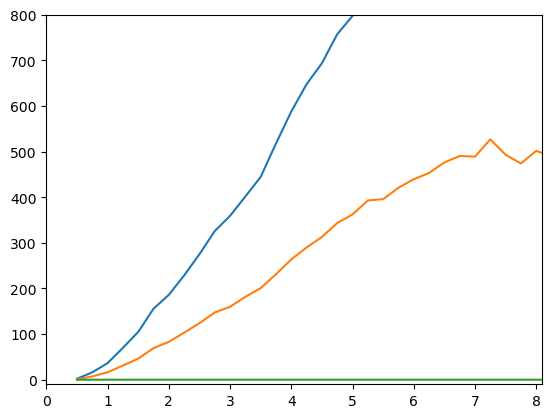

In [12]:
plt.plot(pd.unique(df_deviations["t"]), MSDs)
plt.plot(pd.unique(df_deviations["t"]), MSDs_rt)
plt.plot(pd.unique(df_deviations["t"]), MSDs_37)
plt.xlim(0,8.1)
plt.ylim(-10,800)

In [13]:
MSDs

[2.1214383838383726,
 16.16651475247522,
 36.36531934134614,
 69.88281371904758,
 104.76196367942578,
 155.49427532093023,
 185.98230210747658,
 228.4922145321101,
 275.03647594520544,
 325.68220101801785,
 359.1277898837209,
 401.59474704128434,
 444.41984792626715,
 517.7228298130841,
 587.7785285093457,
 647.6206195138889,
 693.5548973242007,
 757.1270429954543,
 797.2454724753361,
 860.7379165829598,
 869.0061122690583,
 911.3952395336321,
 947.5577301651784,
 968.2449196902655,
 1024.3624740666667,
 1050.4650798266666,
 1057.8084635429864,
 1128.9409521165917,
 1056.3853668274337,
 1014.8384849513275,
 1057.3823130987123,
 1032.8487558051945,
 1055.0442782245761,
 1105.1867231125539,
 1115.436409300429,
 1164.1354011179037,
 1205.782458852174,
 1223.9852964757708,
 1274.789586592105,
 1308.4575616304346,
 1299.8853915411255,
 1315.1666084051722,
 1339.8247244743588,
 1409.1745221379308,
 1427.907507754237,
 1487.1569213376622,
 1428.8689547264953,
 1481.5392053097344,
 1522.762394

# Bacterial CPM

- either 1 or 2 pixels (2-4 $\mu m$) -> 1 cell is 2 Microns, the unit in the df for positions is Microns
- 

In [14]:
device = t.device('cpu')

In [15]:
def create_dist_matrix(batch:t.Tensor):
    dist_matrix:np.ndarray = ndimage.distance_transform_edt(1-batch[0].cpu(), return_indices=False)
    dist_matrix = dist_matrix**2
    dist_matrix_t = t.from_numpy(dist_matrix).to(device)
    return dist_matrix_t

In [16]:
MOORE_OFFSETS = t.tensor([(1, 1), (1, -1), (1, 0), (-1, 0), (0, 0), (-1, 1), (-1, -1), (0, 1), (0, -1)], device=device)
def get_moore_nbh(batch:t.Tensor):
    _, batch_height, _ = batch.shape
    cell_pixel_coords = (batch == 1).nonzero()
    nbh_coords = (cell_pixel_coords[:, 1:].unsqueeze(1)+MOORE_OFFSETS.type(t.float).unsqueeze(0))
    idx_pad = cell_pixel_coords[:, 0].repeat(9,1).T.reshape(cell_pixel_coords[:, 0].shape[0], 9, 1)
    nbh_coords[nbh_coords == -1] = 1
    nbh_coords[nbh_coords == batch_height] = batch_height -2
    return t.concatenate((idx_pad, nbh_coords), dim=-1)

In [39]:
STEP_SIZES = t.tensor([(1, 0), (0, 1), (-1, 0), (0, -1), (1, 1), (1, -1), (-1, 1), (-1, -1)], device=device)
def MCS(batch, temperature):
    batch_size, batch_height, _ = batch.shape
    
    #########################################################
    # 1. Find source and target coordinates for each sample #
    #########################################################
    # Find all pixels that belong to a cell, or border a cell 
    frontiers = get_moore_nbh(batch)
    src_coords = []
    for batch_idx in range(batch_size):
        frontier = frontiers[frontiers[:, :, 0] == batch_idx, :].unique(dim=0)
        src_coords.append(random.choice(frontier).type(t.long))
    batch_src_coords = t.vstack(src_coords)
    p_f = np.sqrt(2.)
    p_side = (p_f - 1)*p_f/4
    p_diag = (p_f - 1)/4
    step_size_idx = t.tensor(np.random.choice(
            STEP_SIZES.shape[0],
            size=batch_src_coords.shape[0],
            replace=True,
            p=[p_side, p_side, p_side, p_side, p_diag, p_diag, p_diag, p_diag])).type(t.long)
    step_sizes = STEP_SIZES[step_size_idx]
    tgt_coords = t.hstack((batch_src_coords[:, 0].unsqueeze(0).T, batch_src_coords[:, 1:] + step_sizes))
    tgt_coords[:, 1:][tgt_coords[:, 1:] == -1] = 1
    tgt_coords[:, 1:][tgt_coords[:, 1:] == batch_height] = batch_height -2
    tgt_i = tgt_coords[:, 0]
    tgt_j = tgt_coords[:, 1]
    tgt_k = tgt_coords[:, 2]
    src_i = batch_src_coords[:, 0]
    src_j = batch_src_coords[:, 1]
    src_k = batch_src_coords[:, 2]
    
    #########################################################################
    # 2. Calculate the changes in volume that the copy attempts would cause #
    #########################################################################
    current_volumes = t.sum(batch, dim=(-1, -2))
    vol_changes = (-1 * batch[tgt_i, tgt_j, tgt_k]) + batch[src_i, src_j, src_k]
    adjusted_vols = current_volumes + vol_changes
    
    #########################################################
    # 3. Define boolean masks based on the volume changes   #
    #########################################################
    sml_eq_two_mask = adjusted_vols <= 2
    greater_zero_mask = adjusted_vols > 0
    vol_change_positive_mask = vol_changes > 0
    vol_change_negative_mask = vol_changes < 0
    
    #########################################################
    # 4. auto accept each attempt with negative vol. change #
    # that fulfills the hard volume constraint              #
    #########################################################
    auto_upd_mask = t.logical_and(
        vol_change_negative_mask,
        greater_zero_mask
    )
    auto_upd_i = tgt_i[auto_upd_mask]
    auto_upd_j = tgt_j[auto_upd_mask]
    auto_upd_k = tgt_k[auto_upd_mask]
    batch[auto_upd_i, auto_upd_j, auto_upd_k] += vol_changes[auto_upd_mask]
    
    ##################################################################
    # 5. stochastic update of the attempts with positive vol. change #
    ################################################################## 
    update_mask = t.logical_and(
        vol_change_positive_mask,
        sml_eq_two_mask
    )
    update_probability = t.sigmoid(temperature)
    logit = t.log(t.hstack((update_probability, (1-update_probability))))
    batch_logits = logit.repeat((vol_changes[update_mask].shape[0],1))
    one_hot = t.nn.functional.gumbel_softmax(batch_logits, hard=True)
    
    upd_vals = one_hot[:, 0] * vol_changes[update_mask]
    upd_i = tgt_i[update_mask]
    upd_j = tgt_j[update_mask]
    upd_k = tgt_k[update_mask]
    batch[upd_i, upd_j, upd_k] += upd_vals.squeeze()
    
    return batch

In [64]:
def step(batch:t.Tensor, dist_matrix:t.Tensor, temperature:t.Tensor, eta:float, num_steps:int, target_distance:float):
    for i in tqdm(range(num_steps)):
        batch = MCS(batch, temperature)
        if t.any(t.sum(batch, dim=(-1,-2)) == 0) or t.any(t.sum(batch, dim=(-1,-2)) > 2):
            print("ISSUE DETECTED, STOP SIM")
            return None, None
    # calc the distance after 100 steps    
    distances = t.sum(batch * dist_matrix, dim=(-1,-2)) / t.sum(batch, dim=(-1,-2))
    # one pixel is half of a micron, meaning that the number of pixels traveled needs to be divided by 2
    mean_distance = t.mean(distances)
    print(f"temperature: {temperature}, update_prob:{t.sigmoid(temperature)} mean distance: {mean_distance}")
    loss = (mean_distance - target_distance)**2
    grad = t.autograd.grad(loss, temperature)[0]
    print(f"gradient: {grad}")
    return temperature - (eta * grad), grad, mean_distance, loss

In [ ]:
temps = t.linspace(-3,-1.5,50)
ref = t.zeros(1,128,128, device=device)
ref[:,64,64] += 1
dist_matrix = create_dist_matrix(ref)
target_distance = 2

grads = []
mean_distances = []
losses = []
for temp in temps:
    temp.requires_grad_()
    batch = t.zeros(200,128,128, device=device)
    batch[:,64,64] += 1
    new_temp, grad, mean_distance, loss = step(batch, dist_matrix, temp, eta=1, num_steps=500, target_distance=target_distance)
    grads.append(grad.detach().cpu().numpy())
    mean_distances.append(mean_distance.detach().cpu().numpy())
    losses.append(loss.detach().cpu().numpy())

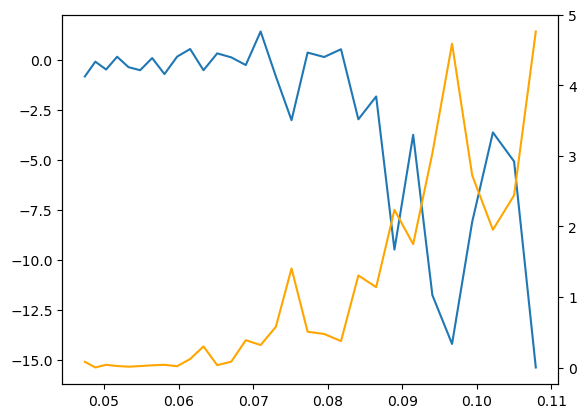

In [58]:
plt.plot(t.sigmoid(temps)[:-20], grads[:-20])
ax2 = plt.twinx()
ax2.plot(t.sigmoid(temps)[:-20], losses[:-20], color="orange")

In [ ]:
temp = t.tensor(-4.)
temp.requires_grad_()
grads = []
mean_distances = []
losses = []
temps = [temp.detach().cpu().numpy()]
for i in range(1000):
    temp.requires_grad_()
    batch = t.zeros(500,128,128, device=device)
    batch[:,64,64] += 1
    temp, grad, mean_distance, loss = step(batch, dist_matrix, temp, eta=5e-4, num_steps=500, target_distance=target_distance)
    grads.append(grad.detach().cpu().numpy())
    mean_distances.append(mean_distance.detach().cpu().numpy())
    losses.append(loss.detach().cpu().numpy())
    temps.append(temp.detach().cpu().numpy())

In [71]:
np.save("grads.npy", np.array(grads))
np.save("mean_dist.npy", np.array(mean_distances))
np.save("losses.npy", np.array(losses))
np.save("temps.npy", np.array(temps))

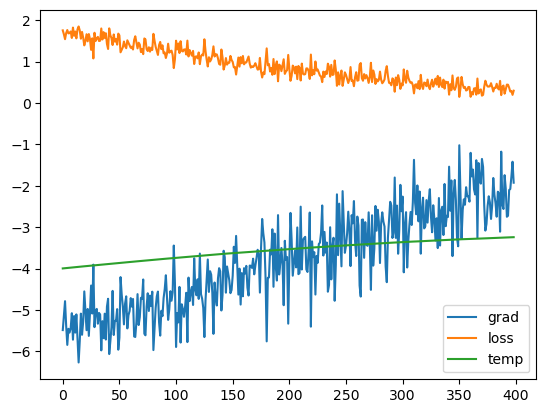

In [86]:
np.arange(len(temps[1:]))
plt.plot(np.arange(len(temps[1:])), grads, label="grad")
plt.plot(np.arange(len(temps[1:])), losses, label="loss")
plt.plot(np.arange(len(temps[1:])), temps[1:], label="temp")
plt.legend()

In [ ]:
for i in range(500):
    temp.requires_grad_()
    batch = t.zeros(500,128,128, device=device)
    batch[:,64,64] += 1
    temp, grad, mean_distance, loss = step(batch, dist_matrix, temp, eta=5e-4, num_steps=500, target_distance=target_distance)
    grads.append(grad.detach().cpu().numpy())
    mean_distances.append(mean_distance.detach().cpu().numpy())
    losses.append(loss.detach().cpu().numpy())
    temps.append(temp.detach().cpu().numpy())